# Capstone Project - H&M Recommendation

Ana Berta Vegas; Ester Iglesias; Raquel Dominguez

## Articles

En aquest notebook estudiarem el dataset "articles".

En primer lloc, importem les llibreries necessàries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

Llegim les dades a tractar i observem quina informació contenen:

In [2]:
df_articles = pd.read_csv('articles.csv')

In [3]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

El dataset consisteix en 105542 observacions amb la següent informació per a cada una:

- **article_id**: id de l'article                  
- **product_code**: codi identificatiu de l'article         
- **prod_name**: nom de l'article
- **product_type_no**: codi del tipus de producte
- **product_type_name**: nom del tipus de producte
- **product_group_name**: nom del grup de producte
- **graphical_appearance_no**: codi de apariencia grafica 
- **graphical_appearance_name**:  nom de apariencia grafica 
- **colour_group_code**: codi del grup de color 
- **colour_group_name**: nom del grup de color
- **perceived_colour_value_id**: codi del valor de color percebut 
- **perceived_colour_value_name**: nom del valor de color percebut 
- **perceived_colour_master_id**: codi del valor "master" de color percebut 
- **perceived_colour_master_name**: nom del valor "master" de color percebut 
- **department_no**: codi del departament
- **department_name**: nom del departament
- **index_code**: codi del index 
- **index_name**: nom del index
- **index_group_no**: codi del grup index 
- **index_group_name**: nom del grup index
- **section_no**: codi de seccio
- **section_name**: nom de seccio
- **garment_group_no**: codi de grup de peces
- **garment_group_name**:nom de grup de peces 
- **detail_desc**:descripcio del producte

Totes les variables anteriors són categòriques. Cal canviar el tipus per tal de fer l'anàlisi correctament:

In [5]:
df_articles["article_id"] = df_articles["article_id"].astype("category")
df_articles["product_code"] = df_articles["product_code"].astype("category")
df_articles["product_type_no"] = df_articles["product_type_no"].astype("category")
df_articles["graphical_appearance_no"] = df_articles["graphical_appearance_no"].astype("category")
df_articles["colour_group_code"] = df_articles["colour_group_code"].astype("category")
df_articles["perceived_colour_value_id"] = df_articles["perceived_colour_value_id"].astype("category")
df_articles["perceived_colour_master_id"] = df_articles["perceived_colour_master_id"].astype("category")
df_articles["department_no"] = df_articles["department_no"].astype("category")
df_articles["index_code"] = df_articles["index_code"].astype("category")
df_articles["index_group_no"] = df_articles["index_group_no"].astype("category")
df_articles["section_no"] = df_articles["section_no"].astype("category")
df_articles["garment_group_no"] = df_articles["garment_group_no"].astype("category")

Netejem el dataset i borrem les files repetides, ja que no aporten cap valor afegit a l'anàlisi:

In [6]:
df_articles.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
df_articles.shape

(105542, 25)

Observem que la quantitat és exactament la mateixa, és a dir, no hi havia dades repetides.

Veiem ara una primera descripció de les variables:

In [8]:
df_articles.describe()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
count,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,...,105542,105542,105542,105542,105542,105542,105542,105542,105542,105126
unique,105542,47224,45875,132,131,19,30,30,50,50,...,250,10,10,5,5,57,56,21,21,43404
top,108775015,783707,Dragonfly dress,272,Trousers,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1005,Jersey Fancy,T-shirt in printed cotton jersey.
freq,1,75,98,11169,11169,42741,49747,49747,22670,22670,...,4604,26001,26001,39737,39737,7295,7295,21445,21445,159


In [9]:
df_articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

Observem que hi ha un total de 105542 articles. A més, veiem que hi ha grups de variables que sembla que puguin contenir la mateixa informació. Més endavant ho estudiarem.

A continuació fem un estudi per cada una de les variables. En primer lloc, mirem si hi ha alguna fila amb algun valor buit:

In [10]:
df_articles.isnull().values.any()

True

In [11]:
df_articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

El dataset conté valors nuls en la variable detail_desc.

Analitzem amb més detall cada una de les variables (o cada grup de variables que representin la mateixa informació):

**product_code & prod_name**

In [12]:
df_articles[["product_code", "prod_name"]]

,product_code,prod_name
0,108775,Strap top
1,108775,Strap top
2,108775,Strap top (1)
3,110065,OP T-shirt (Idro)
4,110065,OP T-shirt (Idro)
...,...,...
105537,953450,5pk regular Placement1
105538,953763,SPORT Malaga tank
105539,956217,Cartwheel dress
105540,957375,CLAIRE HAIR CLAW


In [13]:
df_articles["prod_name"].value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

In [14]:
df_articles["product_code"].value_counts()

783707    75
684021    70
699923    52
699755    49
685604    46
          ..
761368     1
761366     1
761360     1
761350     1
959461     1
Name: product_code, Length: 47224, dtype: int64

In [15]:
df_articles[df_articles["product_code"] == 783707]["prod_name"].value_counts()

1pk Fun         55
1pk Fun 1       19
1pk fun sock     1
Name: prod_name, dtype: int64

Observem que hi ha diferents noms per referir-nos a un mateix producte. Tot i així, la informació que ens aporten les variables *prod_name* i *prod_code* és exactament la mateixa, per tant, eliminem la columna *prod_name*:

In [16]:
df_articles = df_articles.drop(['prod_name'], axis=1)

**product_type_no & product_type_name**

In [17]:
df_articles[["product_type_no", "product_type_name"]]

,product_type_no,product_type_name
0,253,Vest top
1,253,Vest top
2,253,Vest top
3,306,Bra
4,306,Bra
...,...,...
105537,302,Socks
105538,253,Vest top
105539,265,Dress
105540,72,Hair clip


In [18]:
df_articles["product_type_no"].value_counts()

272    11169
265    10362
252     9302
255     7904
254     4155
       ...  
492        1
468        1
483        1
489        1
464        1
Name: product_type_no, Length: 132, dtype: int64

In [19]:
df_articles["product_type_name"].value_counts()

Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

In [20]:
df_articles[df_articles["product_type_no"] == 83]

,article_id,product_code,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
719,289597012,289597,83,Umbrella,Accessories,1010016,Solid,50,Other Pink,5,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
720,289597015,289597,83,Umbrella,Accessories,1010001,All over pattern,9,Black,4,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
721,289597016,289597,83,Umbrella,Accessories,1010001,All over pattern,51,Light Pink,1,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
722,289597022,289597,83,Umbrella,Accessories,1010016,Solid,73,Dark Blue,4,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
1104,318035003,318035,83,Umbrella,Accessories,1010019,Transparent,2,Transparent,3,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1105,318035009,318035,83,Umbrella,Accessories,1010001,All over pattern,73,Dark Blue,4,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1106,318035015,318035,83,Umbrella,Accessories,1010019,Transparent,51,Light Pink,1,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1107,318035017,318035,83,Umbrella,Accessories,1010019,Transparent,9,Black,4,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1108,318035018,318035,83,Umbrella,Accessories,1010006,Dot,10,White,3,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1109,318035022,318035,83,Umbrella,Accessories,1010001,All over pattern,2,Transparent,3,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."


In [21]:
df_articles[df_articles["product_type_name"] == "Umbrella"]

,article_id,product_code,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
36,130035001,130035,532,Umbrella,Items,1010016,Solid,9,Black,4,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
719,289597012,289597,83,Umbrella,Accessories,1010016,Solid,50,Other Pink,5,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
720,289597015,289597,83,Umbrella,Accessories,1010001,All over pattern,9,Black,4,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
721,289597016,289597,83,Umbrella,Accessories,1010001,All over pattern,51,Light Pink,1,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
722,289597022,289597,83,Umbrella,Accessories,1010016,Solid,73,Dark Blue,4,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
1104,318035003,318035,83,Umbrella,Accessories,1010019,Transparent,2,Transparent,3,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1105,318035009,318035,83,Umbrella,Accessories,1010001,All over pattern,73,Dark Blue,4,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1106,318035015,318035,83,Umbrella,Accessories,1010019,Transparent,51,Light Pink,1,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1107,318035017,318035,83,Umbrella,Accessories,1010019,Transparent,9,Black,4,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1108,318035018,318035,83,Umbrella,Accessories,1010006,Dot,10,White,3,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."


Observem que les dues variables no representen exactament la mateixa informació. Per exemple, el *product_type_no* 532 i el 83 tenen el mateix *product_type_name* = Umbrella. El codi del producte és diferent segons el *product_group_name* que li correspon.

In [22]:
df_articles[df_articles["product_type_no"] == -1].head()

,article_id,product_code,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
64,156224002,156224,-1,Unknown,Unknown,1010016,Solid,9,Black,4,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
4015,473954008,473954,-1,Unknown,Unknown,1010016,Solid,9,Black,4,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4016,473954013,473954,-1,Unknown,Unknown,1010016,Solid,12,Light Beige,1,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4017,473954014,473954,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,2,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4018,473954015,473954,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,4,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."


Observem que hi ha articles amb el valor -1, que es correspon amb tipus de producte *Unknown*.

Veiem quin tipus de producte predomina més i quin menys:

In [23]:
df_articles["product_type_name"].value_counts().head()

Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Name: product_type_name, dtype: int64

In [24]:
df_articles["product_type_name"].value_counts().tail(12)

Bumbag           1
Pre-walkers      1
Bra extender     1
Wood balls       1
Towel            1
Sewing kit       1
Washing bag      1
Keychain         1
Headband         1
Cushion          1
Blanket          1
Clothing mist    1
Name: product_type_name, dtype: int64

Nomes hi ha un article que es correspon amb el tipus de producte de la llista anterior.

**product_group_name**

Cada tipus de producte està inclós dins d'un grup (*product_group_name*), veiem, de manera gràfica, quin grup conté més tipus:

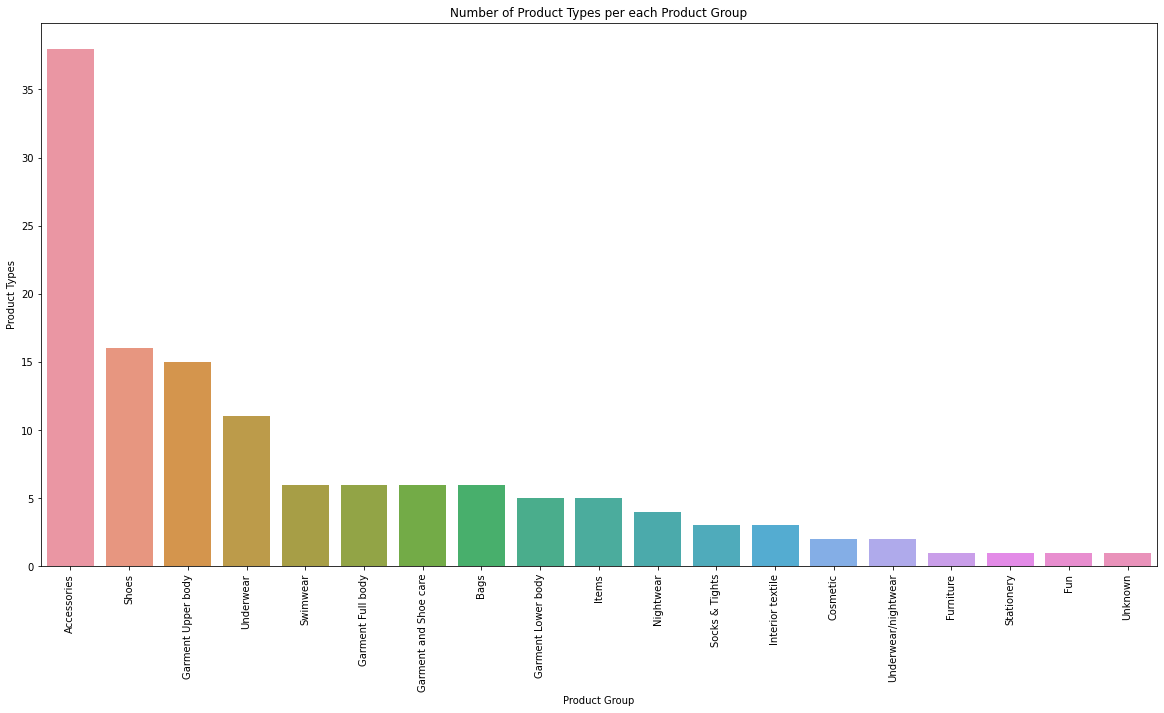

In [25]:
df = pd.DataFrame({'Product Group': df_articles.groupby(["product_group_name"])["product_type_name"].nunique().index,
                   'Product Types': df_articles.groupby(["product_group_name"])["product_type_name"].nunique().values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (20,10))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

El grup de productes que conté més tipus d'articles és el grup *Accessories*.

Tot i així, veiem quins grups contenen més i menys articles:

In [26]:
df_articles["product_group_name"].value_counts().head()

Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Name: product_group_name, dtype: int64

In [27]:
df_articles["product_group_name"].value_counts().tail()

Furniture                13
Garment and Shoe care     9
Stationery                5
Interior textile          3
Fun                       2
Name: product_group_name, dtype: int64

I de manera gràfica:

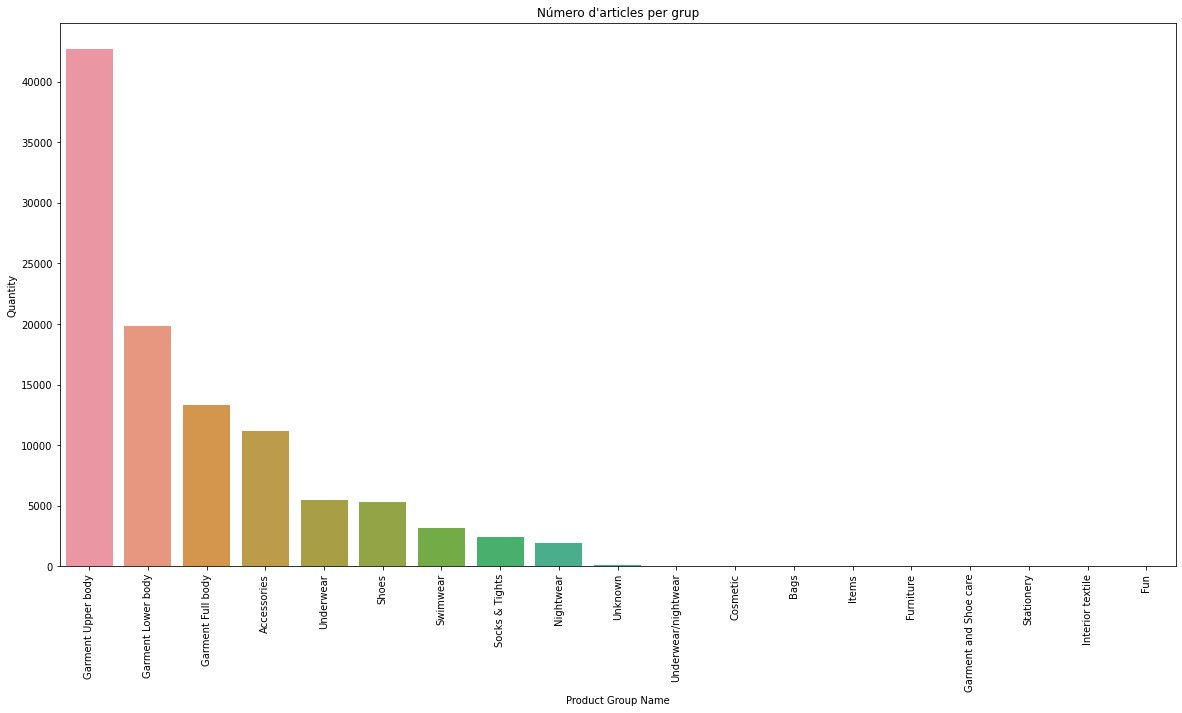

In [28]:
df = pd.DataFrame({'Product Group Name': df_articles["product_group_name"].value_counts().index,
                   'Quantity': df_articles["product_group_name"].value_counts().values
                  })
plt.figure(figsize = (20,10))
plt.title(f"Número d'articles per grup")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group Name', y="Quantity", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Tot i que hem vist que *product_type_name* i *product_type_code* no contenen exactament la mateixa informació, cada article queda totalment identificat amb les variables *product_type_code* i *product_group_name*, pel que podem precindir del nom del tipus del producte, ja que no aporta cap informació interessant.

In [29]:
df_articles = df_articles.drop(['product_type_name'], axis=1)

**graphical_appearance_no & graphical_appearance_name**

In [30]:
df_articles[["graphical_appearance_no", "graphical_appearance_name"]]

,graphical_appearance_no,graphical_appearance_name
0,1010016,Solid
1,1010016,Solid
2,1010017,Stripe
3,1010016,Solid
4,1010016,Solid
...,...,...
105537,1010014,Placement print
105538,1010016,Solid
105539,1010016,Solid
105540,1010016,Solid


In [31]:
df_articles["graphical_appearance_no"].value_counts()

1010016    49747
1010001    17165
1010010     5938
1010017     4990
1010023     4842
1010008     3215
1010014     3098
1010004     2178
1010005     1830
1010021     1513
1010026     1502
1010002     1341
1010007     1165
1010012     1132
1010009      958
1010022      830
1010015      806
1010006      681
1010018      586
1010013      515
1010020      376
1010011      346
1010024      322
1010025      153
1010019       86
1010028       86
1010027       66
-1            52
1010003       15
1010029        8
Name: graphical_appearance_no, dtype: int64

In [32]:
df_articles["graphical_appearance_name"].value_counts()

Solid                  49747
All over pattern       17165
Melange                 5938
Stripe                  4990
Denim                   4842
Front print             3215
Placement print         3098
Check                   2178
Colour blocking         1830
Lace                    1513
Other structure         1502
Application/3D          1341
Embroidery              1165
Mixed solid/pattern     1132
Glittering/Metallic      958
Jacquard                 830
Sequin                   806
Dot                      681
Treatment                586
Other pattern            515
Contrast                 376
Metallic                 346
Chambray                 322
Slub                     153
Transparent               86
Mesh                      86
Neps                      66
Unknown                   52
Argyle                    15
Hologram                   8
Name: graphical_appearance_name, dtype: int64

In [33]:
df_graphical_appearance_no = pd.DataFrame()
df_graphical_appearance_no["graphical_appearance_no_values"] = df_articles["graphical_appearance_no"].value_counts()
df_graphical_appearance_no.reset_index(level=0, inplace=True)
df_graphical_appearance_no

,index,graphical_appearance_no_values
0,1010016,49747
1,1010001,17165
2,1010010,5938
3,1010017,4990
4,1010023,4842
5,1010008,3215
6,1010014,3098
7,1010004,2178
8,1010005,1830
9,1010021,1513


In [34]:
df_graphical_appearance_name = pd.DataFrame()
df_graphical_appearance_name["graphical_appearance_name_values"] = df_articles["graphical_appearance_name"].value_counts()
df_graphical_appearance_name.reset_index(level=0, inplace=True)
df_graphical_appearance_name

,index,graphical_appearance_name_values
0,Solid,49747
1,All over pattern,17165
2,Melange,5938
3,Stripe,4990
4,Denim,4842
5,Front print,3215
6,Placement print,3098
7,Check,2178
8,Colour blocking,1830
9,Lace,1513


In [35]:
df_graphical_appearance_name["graphical_appearance_name_values"].equals(df_graphical_appearance_no["graphical_appearance_no_values"])

True

Observem que la variable *graphical_appearance_no* conté exactament la mateixa informació que la variable *graphical_appearance_name*.

Veiem gràficament, quina és la tendència de l'aspecte gràfic dels articles:

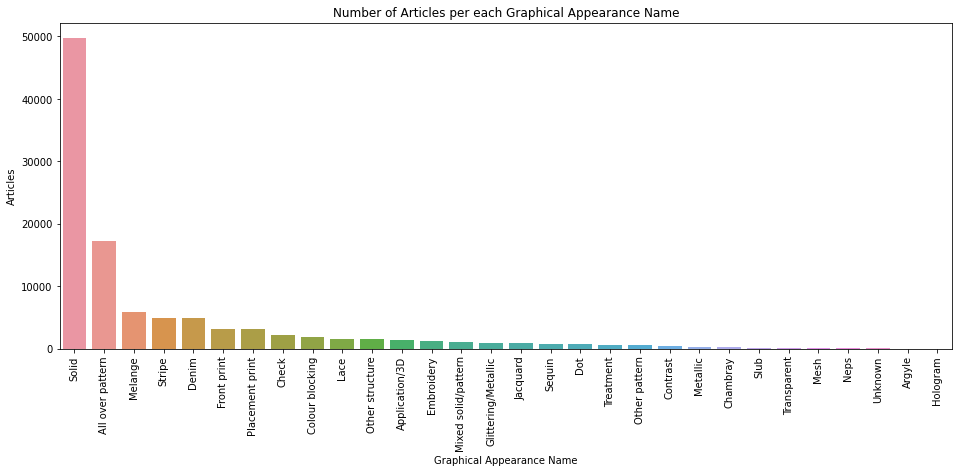

In [36]:
df = pd.DataFrame({'Graphical Appearance Name': df_articles.groupby(["graphical_appearance_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["graphical_appearance_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Graphical Appearance Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Graphical Appearance Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Observem que és l'aspecte que més predomina és el sòlid, i el que menys l'hologram.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *graphical_appearance_name*:

In [37]:
df_articles = df_articles.drop(['graphical_appearance_name'], axis=1)

**colour_group_code & colour_group_name**

In [38]:
df_articles[["colour_group_code", "colour_group_name"]]

,colour_group_code,colour_group_name
0,9,Black
1,10,White
2,11,Off White
3,9,Black
4,10,White
...,...,...
105537,9,Black
105538,9,Black
105539,9,Black
105540,9,Black


In [39]:
df_articles["colour_group_code"].value_counts()

9     22670
73    12171
10     9542
51     5811
7      4487
12     3356
72     3308
42     3056
71     3012
19     2767
8      2731
11     2726
13     2712
43     2340
93     2106
6      2105
52     2063
22     1645
31     1520
17     1471
5      1377
14     1084
81     1027
21      984
33      886
53      818
92      815
32      779
50      750
3       709
91      681
23      574
61      553
83      473
82      435
63      315
41      285
15      226
20      225
62      182
30      153
90      129
40      114
1       105
4        94
70       51
60       46
2        31
-1       28
80       14
Name: colour_group_code, dtype: int64

In [40]:
df_articles["colour_group_name"].value_counts()

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [41]:
df_colour_group_code = pd.DataFrame()
df_colour_group_code["colour_group_code_values"] = df_articles["colour_group_code"].value_counts()
df_colour_group_code.reset_index(level=0, inplace=True)
df_colour_group_code

,index,colour_group_code_values
0,9,22670
1,73,12171
2,10,9542
3,51,5811
4,7,4487
5,12,3356
6,72,3308
7,42,3056
8,71,3012
9,19,2767


In [42]:
df_colour_group_name = pd.DataFrame()
df_colour_group_name["colour_group_name_values"] = df_articles["colour_group_name"].value_counts()
df_colour_group_name.reset_index(level=0, inplace=True)
df_colour_group_name

,index,colour_group_name_values
0,Black,22670
1,Dark Blue,12171
2,White,9542
3,Light Pink,5811
4,Grey,4487
5,Light Beige,3356
6,Blue,3308
7,Red,3056
8,Light Blue,3012
9,Greenish Khaki,2767


In [43]:
df_colour_group_name["colour_group_name_values"].equals(df_colour_group_code["colour_group_code_values"])

True

Observem que la variable *colour_group_code* conté exactament la mateixa informació que la variable *colour_group_name*.

Veiem gràficament, quina és la tendència dels colors en els articles:

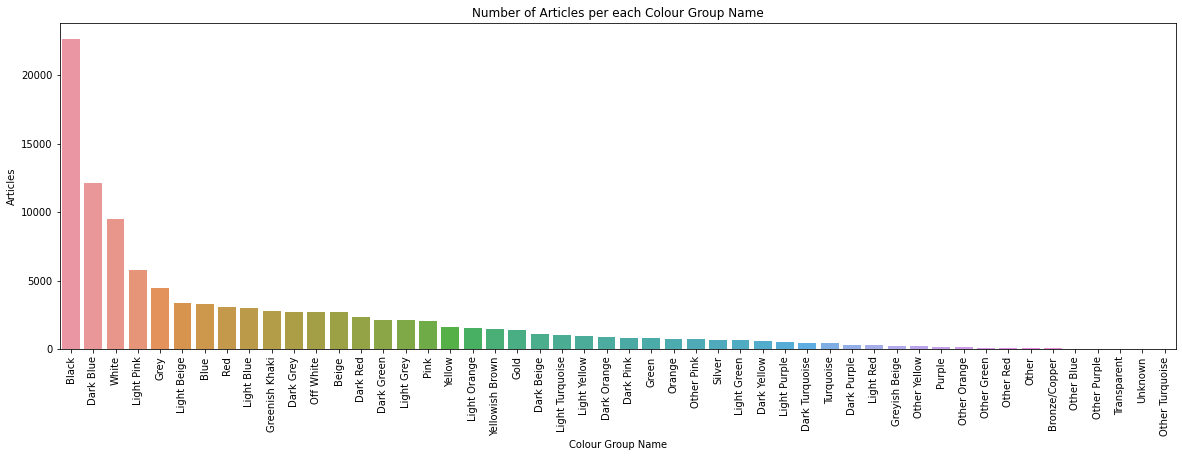

In [44]:
df = pd.DataFrame({'Colour Group Name': df_articles.groupby(["colour_group_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["colour_group_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Observem que els colors que més apareixen son el negre i el blau fosc. Per contra, els que menys es repeteixen son els que estan sota la categoría d'altres turqueses o desconeguts.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *colour_group_name*:

In [45]:
df_articles = df_articles.drop(['colour_group_name'], axis=1)

**perceived_colour_value_id & perceived_colour_value_name**

In [46]:
df_articles[["perceived_colour_value_id", "perceived_colour_value_name"]]

,perceived_colour_value_id,perceived_colour_value_name
0,4,Dark
1,3,Light
2,1,Dusty Light
3,4,Dark
4,3,Light
...,...,...
105537,4,Dark
105538,4,Dark
105539,4,Dark
105540,4,Dark


In [47]:
df_articles["perceived_colour_value_id"].value_counts()

4     42706
1     22152
3     15739
2     12630
5      6471
7      5711
6       105
-1       28
Name: perceived_colour_value_id, dtype: int64

In [48]:
df_articles["perceived_colour_value_name"].value_counts()

Dark            42706
Dusty Light     22152
Light           15739
Medium Dusty    12630
Bright           6471
Medium           5711
Undefined         105
Unknown            28
Name: perceived_colour_value_name, dtype: int64

In [49]:
df_perceived_colour_value_id = pd.DataFrame()
df_perceived_colour_value_id["perceived_colour_value_id_values"] = df_articles["perceived_colour_value_id"].value_counts()
df_perceived_colour_value_id.reset_index(level=0, inplace=True)
df_perceived_colour_value_id

,index,perceived_colour_value_id_values
0,4,42706
1,1,22152
2,3,15739
3,2,12630
4,5,6471
5,7,5711
6,6,105
7,-1,28


In [50]:
df_perceived_colour_value_name = pd.DataFrame()
df_perceived_colour_value_name["perceived_colour_value_name_values"] = df_articles["perceived_colour_value_name"].value_counts()
df_perceived_colour_value_name.reset_index(level=0, inplace=True)
df_perceived_colour_value_name

,index,perceived_colour_value_name_values
0,Dark,42706
1,Dusty Light,22152
2,Light,15739
3,Medium Dusty,12630
4,Bright,6471
5,Medium,5711
6,Undefined,105
7,Unknown,28


In [51]:
df_perceived_colour_value_id["perceived_colour_value_id_values"].equals(df_perceived_colour_value_name["perceived_colour_value_name_values"])

True

Observem que la variable *perceived_colour_value_id* conté exactament la mateixa informació que la variable *perceived_colour_value_name*.

Veiem gràficament, quin color predomina en els articles estudiats:

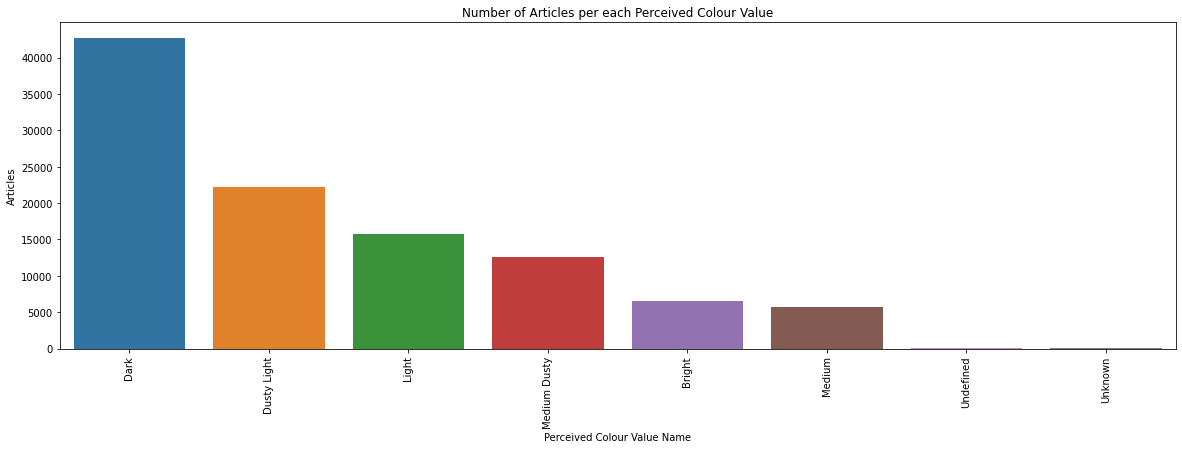

In [52]:
df = pd.DataFrame({'Perceived Colour Value Name': df_articles.groupby(["perceived_colour_value_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["perceived_colour_value_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Perceived Colour Value')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Value Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

El color més freqüent és el fosc (totalment lògic, ja que el color que més predomina és el negre) i el que menys, es qualifica com a desconegut o indefinit.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *perceived_colour_value_name*:

In [53]:
df_articles = df_articles.drop(['perceived_colour_value_name'], axis=1)

**perceived_colour_master_id & perceived_colour_master_name**

In [54]:
df_articles[["perceived_colour_master_id", "perceived_colour_master_name"]]

,perceived_colour_master_id,perceived_colour_master_name
0,5,Black
1,9,White
2,9,White
3,5,Black
4,9,White
...,...,...
105537,5,Black
105538,5,Black
105539,5,Black
105540,5,Black


In [55]:
df_articles["perceived_colour_master_id"].value_counts()

5     22585
2     18469
9     12665
4      9403
12     8924
18     5878
11     5657
19     3526
20     3181
8      3121
3      2734
13     2269
15     2180
7      1829
1      1223
6      1100
-1      685
14      105
10        5
16        3
Name: perceived_colour_master_id, dtype: int64

In [56]:
df_articles["perceived_colour_master_name"].value_counts()

Black              22585
Blue               18469
White              12665
Pink                9403
Grey                8924
Red                 5878
Beige               5657
Green               3526
Khaki green         3181
Yellow              3121
Orange              2734
Brown               2269
Metal               2180
Turquoise           1829
Mole                1223
Lilac Purple        1100
Unknown              685
undefined            105
Yellowish Green        5
Bluish Green           3
Name: perceived_colour_master_name, dtype: int64

In [57]:
df_perceived_colour_master_id = pd.DataFrame()
df_perceived_colour_master_id["perceived_colour_master_id_values"] = df_articles["perceived_colour_master_id"].value_counts()
df_perceived_colour_master_id.reset_index(level=0, inplace=True)
df_perceived_colour_master_id

,index,perceived_colour_master_id_values
0,5,22585
1,2,18469
2,9,12665
3,4,9403
4,12,8924
5,18,5878
6,11,5657
7,19,3526
8,20,3181
9,8,3121


In [58]:
df_perceived_colour_master_name = pd.DataFrame()
df_perceived_colour_master_name["perceived_colour_master_name_values"] = df_articles["perceived_colour_master_name"].value_counts()
df_perceived_colour_master_name.reset_index(level=0, inplace=True)
df_perceived_colour_master_name

,index,perceived_colour_master_name_values
0,Black,22585
1,Blue,18469
2,White,12665
3,Pink,9403
4,Grey,8924
5,Red,5878
6,Beige,5657
7,Green,3526
8,Khaki green,3181
9,Yellow,3121


In [59]:
df_perceived_colour_master_name["perceived_colour_master_name_values"].equals(df_perceived_colour_master_id["perceived_colour_master_id_values"])

True

Observem que la variable *perceived_colour_master_id* conté exactament la mateixa informació que la variable *perceived_colour_master_name*.

Veiem gràficament, quin color predomina en els articles estudiats:

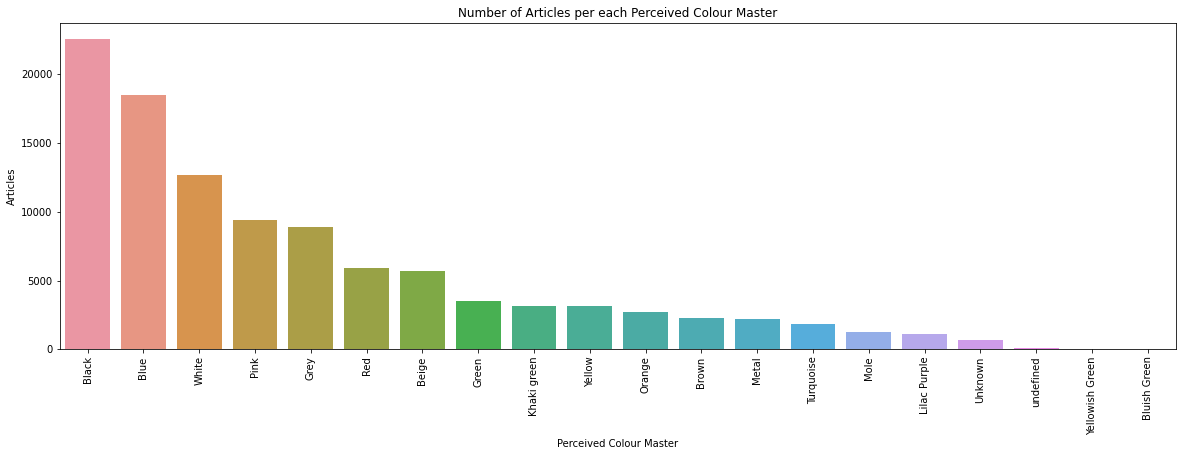

In [60]:
df = pd.DataFrame({'Perceived Colour Master': df_articles.groupby(["perceived_colour_master_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["perceived_colour_master_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Perceived Colour Master')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Master', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Com podiem esperar, el color més freqüent és el negre i el que menys, el verd blavós.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *perceived_colour_master_name*:

In [61]:
df_articles = df_articles.drop(['perceived_colour_master_name'], axis=1)

**department_no & department_name**

In [62]:
df_articles[["department_no", "department_name"]]

,department_no,department_name
0,1676,Jersey Basic
1,1676,Jersey Basic
2,1676,Jersey Basic
3,1339,Clean Lingerie
4,1339,Clean Lingerie
...,...,...
105537,7188,Socks Bin
105538,1919,Jersey
105539,1641,Jersey
105540,3946,Small Accessories


In [63]:
df_articles["department_no"].value_counts()

7616    2032
1338    1921
8716    1874
4242    1839
7648    1488
        ... 
5787       1
8398       1
3943       1
7659       1
3931       1
Name: department_no, Length: 299, dtype: int64

In [64]:
df_articles["department_name"].value_counts()

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

In [65]:
df_articles[df_articles["department_name"]=="Jersey"]

,article_id,product_code,product_type_no,product_group_name,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
23,120129001,120129,273,Garment Lower body,1010016,9,4,5,2032,Jersey,A,Ladieswear,1,Ladieswear,8,Mama,1005,Jersey Fancy,Leggings in soft jersey with a wide panel at t...
24,120129014,120129,273,Garment Lower body,1010010,9,4,12,2032,Jersey,A,Ladieswear,1,Ladieswear,8,Mama,1005,Jersey Fancy,Leggings in soft jersey with a wide panel at t...
25,120129018,120129,273,Garment Lower body,1010016,43,4,18,2032,Jersey,A,Ladieswear,1,Ladieswear,8,Mama,1005,Jersey Fancy,Leggings in soft jersey with a wide panel at t...
26,120129025,120129,273,Garment Lower body,1010001,8,4,12,2032,Jersey,A,Ladieswear,1,Ladieswear,8,Mama,1005,Jersey Fancy,Leggings in soft jersey with a wide panel at t...
222,198714001,198714,273,Garment Lower body,1010016,9,4,5,2032,Jersey,A,Ladieswear,1,Ladieswear,8,Mama,1005,Jersey Fancy,"3/4-length leggings in soft, organic cotton je..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105535,952937003,952937,265,Garment Full body,1010001,13,2,1,1641,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
105536,952938001,952938,254,Garment Upper body,1010001,13,2,1,1641,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Fitted top in jersey with a round neckline and...
105538,953763001,953763,253,Garment Upper body,1010016,9,4,5,1919,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,265,Garment Full body,1010016,9,4,5,1641,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


Observem que les variables *department_no* i *department_name* no contenen exactament la mateixa informació, ja que, per exemple, el deparment_name = Jersey té associats diferents codis: 2032, 1641 i 1919. És a dir, la variable *department_no* és més específica que la variable *department_name*. És per això que es borra la segona, ja que no aporta valor afegit:

In [66]:
df_articles = df_articles.drop(['department_name'], axis=1)

**index_code & index_name**

In [67]:
df_articles[["index_code", "index_name"]]

,index_code,index_name
0,A,Ladieswear
1,A,Ladieswear
2,A,Ladieswear
3,B,Lingeries/Tights
4,B,Lingeries/Tights
...,...,...
105537,F,Menswear
105538,A,Ladieswear
105539,A,Ladieswear
105540,D,Divided


In [68]:
df_articles["index_code"].value_counts()

A    26001
D    15149
F    12553
H    12007
I     9214
G     8875
C     6961
B     6775
J     4615
S     3392
Name: index_code, dtype: int64

In [69]:
df_articles["index_name"].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

In [70]:
df_index_code = pd.DataFrame()
df_index_code["index_code_values"] = df_articles["index_code"].value_counts()
df_index_code.reset_index(level=0, inplace=True)
df_index_code

,index,index_code_values
0,A,26001
1,D,15149
2,F,12553
3,H,12007
4,I,9214
5,G,8875
6,C,6961
7,B,6775
8,J,4615
9,S,3392


In [71]:
df_index_name = pd.DataFrame()
df_index_name["index_name_values"] = df_articles["index_name"].value_counts()
df_index_name.reset_index(level=0, inplace=True)
df_index_name

,index,index_name_values
0,Ladieswear,26001
1,Divided,15149
2,Menswear,12553
3,Children Sizes 92-140,12007
4,Children Sizes 134-170,9214
5,Baby Sizes 50-98,8875
6,Ladies Accessories,6961
7,Lingeries/Tights,6775
8,"Children Accessories, Swimwear",4615
9,Sport,3392


In [72]:
df_index_name["index_name_values"].equals(df_index_code["index_code_values"])

True

Observem que la variable *index_name* conté exactament la mateixa informació que la variable *index_code*.

Veiem gràficament, com es comporta l'índex respecte la quantitat d'articles:

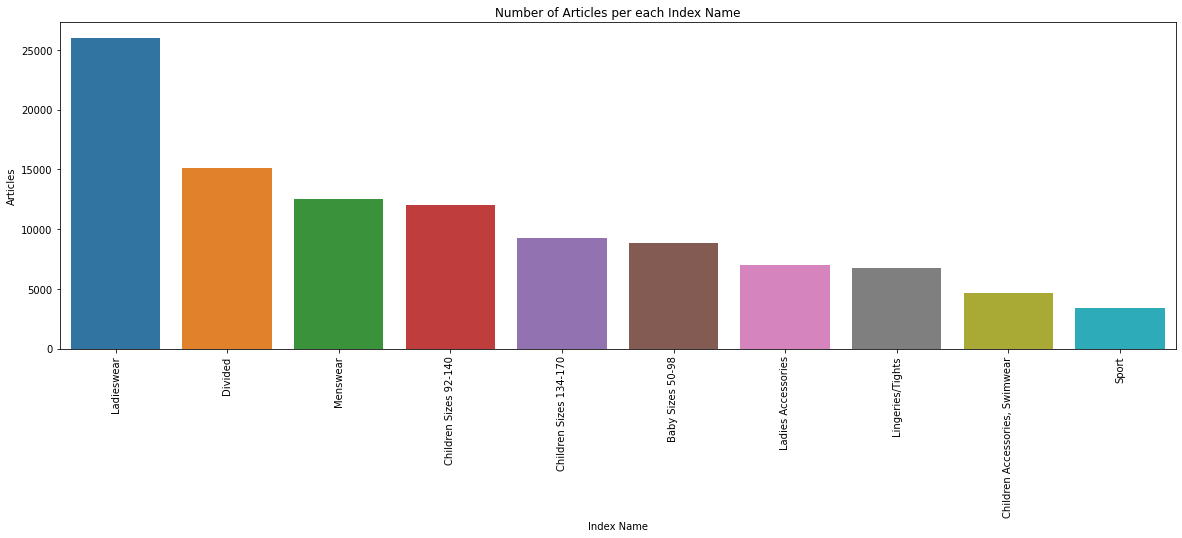

In [73]:
df = pd.DataFrame({'Index Name': df_articles.groupby(["index_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["index_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Index Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Respecte tots els articles, l'índex que més es repeteix es *Ladieswear* i el que menys *Sport*.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *index_name*:

In [74]:
df_articles = df_articles.drop(['index_name'], axis=1)

**index_group_no & index_group_name**

In [75]:
df_articles[["index_group_no", "index_group_name"]]

,index_group_no,index_group_name
0,1,Ladieswear
1,1,Ladieswear
2,1,Ladieswear
3,1,Ladieswear
4,1,Ladieswear
...,...,...
105537,3,Menswear
105538,1,Ladieswear
105539,1,Ladieswear
105540,2,Divided


In [76]:
df_articles["index_group_no"].value_counts()

1     39737
4     34711
2     15149
3     12553
26     3392
Name: index_group_no, dtype: int64

In [77]:
df_articles["index_group_name"].value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [78]:
df_index_group_no = pd.DataFrame()
df_index_group_no["index_group_no_values"] = df_articles["index_group_no"].value_counts()
df_index_group_no.reset_index(level=0, inplace=True)
df_index_group_no

,index,index_group_no_values
0,1,39737
1,4,34711
2,2,15149
3,3,12553
4,26,3392


In [79]:
df_index_group_name = pd.DataFrame()
df_index_group_name["index_group_name_values"] = df_articles["index_group_name"].value_counts()
df_index_group_name.reset_index(level=0, inplace=True)
df_index_group_name

,index,index_group_name_values
0,Ladieswear,39737
1,Baby/Children,34711
2,Divided,15149
3,Menswear,12553
4,Sport,3392


In [80]:
df_index_group_name["index_group_name_values"].equals(df_index_group_no["index_group_no_values"])

True

Observem que la variable *index_group_name* conté exactament la mateixa informació que la variable *index_group_no*.

Veiem gràficament, com es comporta el grup de l'índex respecte la quantitat d'articles:

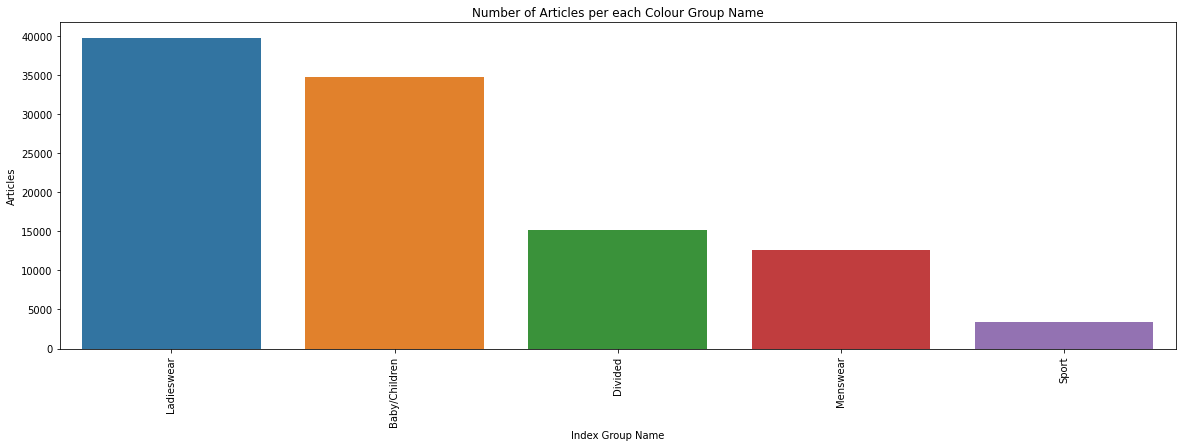

In [81]:
df = pd.DataFrame({'Index Group Name': df_articles.groupby(["index_group_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["index_group_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Com podíem imaginar per la informació anterior de l'índex, de manera lògica, el que més predomina es el de la roba de dona i el que menys el d'esport.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *index_group_name*:

In [82]:
df_articles = df_articles.drop(['index_group_name'], axis=1)

**section_no & section_name**

In [83]:
df_articles[["section_no", "section_name"]]

,section_no,section_name
0,16,Womens Everyday Basics
1,16,Womens Everyday Basics
2,16,Womens Everyday Basics
3,61,Womens Lingerie
4,61,Womens Lingerie
...,...,...
105537,26,Men Underwear
105538,2,H&M+
105539,18,Womens Trend
105540,52,Divided Accessories


In [84]:
df_articles["section_no"].value_counts()

15    7295
53    7124
44    4932
76    4469
77    3899
61    3598
79    3490
11    3376
46    3328
66    3270
6     2725
45    2665
18    2622
50    2364
47    2352
2     2337
26    2322
8     2266
42    2142
72    2034
64    2026
5     1894
60    1839
20    1778
40    1760
52    1732
43    1731
51    1723
41    1717
65    1665
16    1581
62    1566
21    1560
55    1490
23    1428
25    1337
14    1270
57    1101
58     991
22     872
19     829
82     682
27     645
31     629
49     626
97     559
56     521
28     330
24     298
70     280
48     192
30     190
80      35
71      26
29      25
4        3
17       1
Name: section_no, dtype: int64

In [85]:
df_articles["section_name"].value_counts()

Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Accessories      

In [86]:
df_articles[df_articles["section_name"] == "Ladies Other"]

,article_id,product_code,product_type_no,product_group_name,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,section_name,garment_group_no,garment_group_name,detail_desc
38956,659573001,659573,258,Garment Upper body,1010016,12,1,11,1727,A,1,4,Ladies Other,1001,Unknown,Short-sleeved top in satin with a lace yoke an...
38957,659573002,659573,258,Garment Upper body,1010016,9,4,5,1727,A,1,4,Ladies Other,1001,Unknown,Short-sleeved top in satin with a lace yoke an...
40058,663434001,663434,258,Garment Upper body,1010016,8,4,12,1727,A,1,4,Ladies Other,1001,Unknown,Straight-cut blouse in satin crêpe with a smal...
43598,677760001,677760,252,Garment Upper body,1010016,9,4,5,1620,A,1,17,Ladies Other,1005,Jersey Fancy,"Long, cable-knit jumper in a soft cotton blend..."


In [87]:
df_articles[df_articles["section_no"] == 4]

,article_id,product_code,product_type_no,product_group_name,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,section_name,garment_group_no,garment_group_name,detail_desc
38956,659573001,659573,258,Garment Upper body,1010016,12,1,11,1727,A,1,4,Ladies Other,1001,Unknown,Short-sleeved top in satin with a lace yoke an...
38957,659573002,659573,258,Garment Upper body,1010016,9,4,5,1727,A,1,4,Ladies Other,1001,Unknown,Short-sleeved top in satin with a lace yoke an...
40058,663434001,663434,258,Garment Upper body,1010016,8,4,12,1727,A,1,4,Ladies Other,1001,Unknown,Straight-cut blouse in satin crêpe with a smal...


In [88]:
df_articles[df_articles["section_no"] == 17]

,article_id,product_code,product_type_no,product_group_name,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,section_name,garment_group_no,garment_group_name,detail_desc
43598,677760001,677760,252,Garment Upper body,1010016,9,4,5,1620,A,1,17,Ladies Other,1005,Jersey Fancy,"Long, cable-knit jumper in a soft cotton blend..."


Observem que la única diferència és que el *section_no* = 4 i el *section_no* = 17 es refereix al mateix *section_name* = Ladies Other. Com que només hi ha un cas que es dongui per el *section_no* = 17, el reemplacem per un 4 i així tindrem totes les dades correctes.

In [89]:
df_articles["section_no"].replace({17: 4}, inplace=True)

In [90]:
df_section_no = pd.DataFrame()
df_section_no["section_no_values"] = df_articles["section_no"].value_counts()
df_section_no.reset_index(level=0, inplace=True)
df_section_no

,index,section_no_values
0,15,7295
1,53,7124
2,44,4932
3,76,4469
4,77,3899
5,61,3598
6,79,3490
7,11,3376
8,46,3328
9,66,3270


In [91]:
df_section_name = pd.DataFrame()
df_section_name["section_name_values"] = df_articles["section_name"].value_counts()
df_section_name.reset_index(level=0, inplace=True)
df_section_name

,index,section_name_values
0,Womens Everyday Collection,7295
1,Divided Collection,7124
2,Baby Essentials & Complements,4932
3,Kids Girl,4469
4,Young Girl,3899
5,Womens Lingerie,3598
6,Girls Underwear & Basics,3490
7,Womens Tailoring,3376
8,Kids Boy,3328
9,Womens Small accessories,3270


In [92]:
df_section_name["section_name_values"].equals(df_section_no["section_no_values"])

True

Amb el canvi fet, veiem que les variables estudiades contenen exactament la mateixa informació.

Estudiem gràficament el comportament d'aquestes:

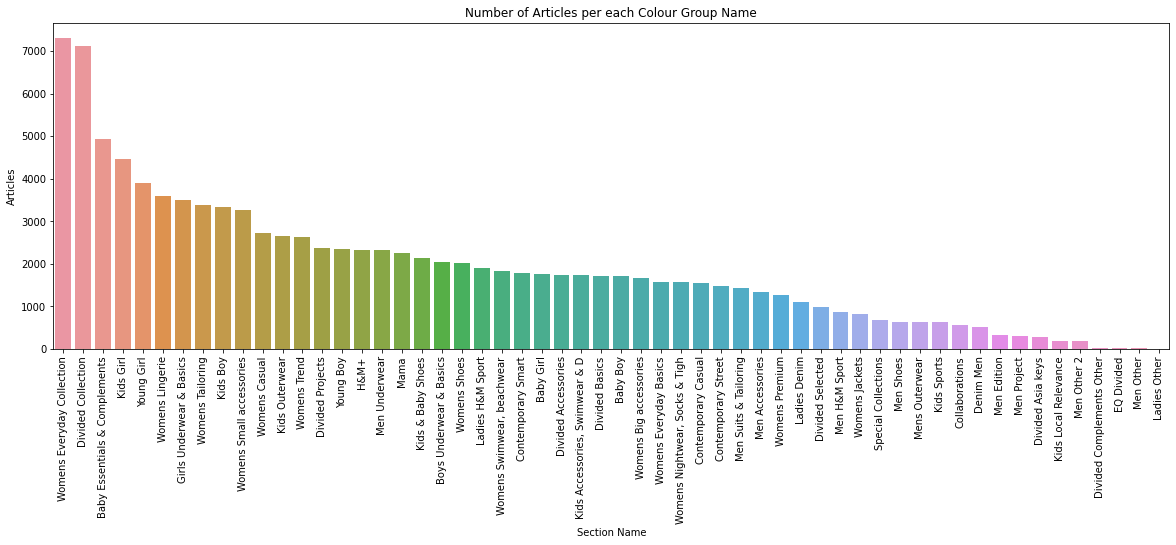

In [93]:
df = pd.DataFrame({'Section Name': df_articles.groupby(["section_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["section_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Els articles de la secció *Womens Everyday Collection* són els que més predominen, i els que estan classificats com a *Other*, ja sigui per home o per dona, els que menys.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *section_name*:

In [94]:
df_articles = df_articles.drop(['section_name'], axis=1)

**garment_group_no & garment_group_name**

In [95]:
df_articles[["garment_group_no", "garment_group_name"]]

,garment_group_no,garment_group_name
0,1002,Jersey Basic
1,1002,Jersey Basic
2,1002,Jersey Basic
3,1017,"Under-, Nightwear"
4,1017,"Under-, Nightwear"
...,...,...
105537,1021,Socks and Tights
105538,1005,Jersey Fancy
105539,1005,Jersey Fancy
105540,1019,Accessories


In [96]:
df_articles["garment_group_no"].value_counts()

1005    21445
1019    11519
1002     8126
1003     7490
1017     7441
1009     6727
1010     5838
1020     5145
1013     4874
1007     4501
1001     3873
1016     3100
1018     2787
1021     2272
1011     2116
1006     1965
1025     1559
1014     1541
1012     1254
1023     1061
1008      908
Name: garment_group_no, dtype: int64

In [97]:
df_articles["garment_group_name"].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [98]:
df_garment_group_no = pd.DataFrame()
df_garment_group_no["garment_group_no_values"] = df_articles["garment_group_no"].value_counts()
df_garment_group_no.reset_index(level=0, inplace=True)
df_garment_group_no

,index,garment_group_no_values
0,1005,21445
1,1019,11519
2,1002,8126
3,1003,7490
4,1017,7441
5,1009,6727
6,1010,5838
7,1020,5145
8,1013,4874
9,1007,4501


In [99]:
df_garment_group_name = pd.DataFrame()
df_garment_group_name["garment_group_name_values"] = df_articles["garment_group_name"].value_counts()
df_garment_group_name.reset_index(level=0, inplace=True)
df_garment_group_name

,index,garment_group_name_values
0,Jersey Fancy,21445
1,Accessories,11519
2,Jersey Basic,8126
3,Knitwear,7490
4,"Under-, Nightwear",7441
5,Trousers,6727
6,Blouses,5838
7,Shoes,5145
8,Dresses Ladies,4874
9,Outdoor,4501


In [100]:
df_garment_group_name["garment_group_name_values"].equals(df_garment_group_no["garment_group_no_values"])

True

Observem que la variable *garment_group_name* conté exactament la mateixa informació que la variable *garment_group_no*.

Veiem gràficament, com es comporten aquestes variables respecte els articles:

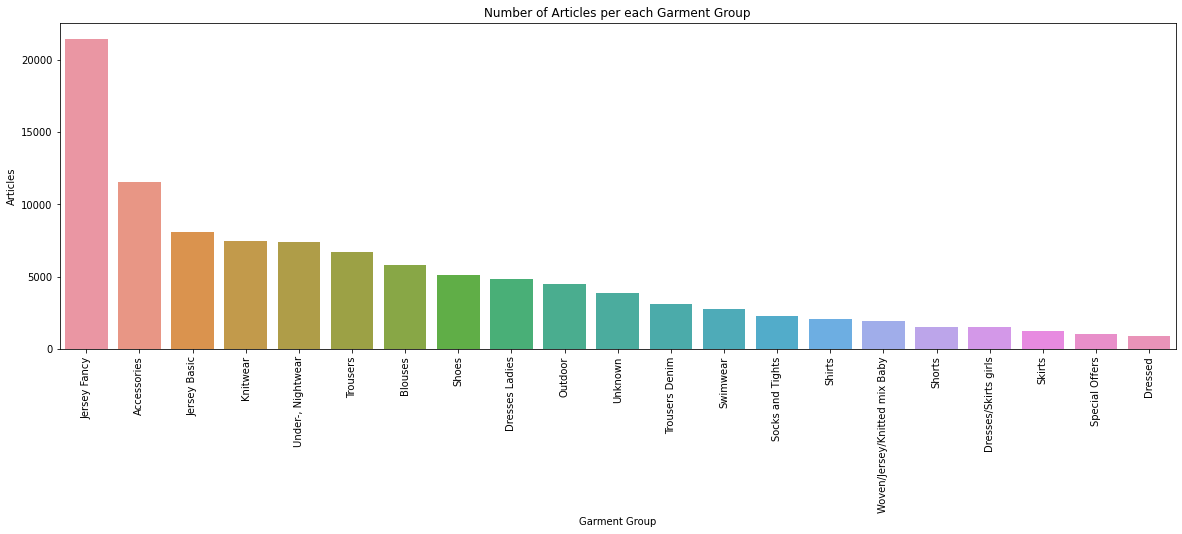

In [101]:
df = pd.DataFrame({'Garment Group': df_articles.groupby(["garment_group_name"])["article_id"].nunique().index,
                   'Articles': df_articles.groupby(["garment_group_name"])["article_id"].nunique().values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (20,6))
plt.title(f'Number of Articles per each Garment Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Garment Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Els articles amb la carecterística *Jersey Fancy* són els que més predominen, i els que estan classificats com a *Dressed*, els que menys.

Com hem vist, les dues variables estudiades tenen el mateix significat. Així doncs, per tal de no tenir la informació duplicada, eliminem la variable *section_name*:

In [102]:
df_articles = df_articles.drop(['garment_group_name'], axis=1)

**detail_desc**

In [103]:
df_articles["detail_desc"].value_counts()

T-shirt in printed cotton jersey.                                                                                                                                                                                      159
Leggings in soft organic cotton jersey with an elasticated waist.                                                                                                                                                      138
T-shirt in soft, printed cotton jersey.                                                                                                                                                                                137
Socks in a soft, jacquard-knit cotton blend with elasticated tops.                                                                                                                                                     136
Fine-knit trainer socks in a soft cotton blend with elasticated tops.                                                       

In [104]:
df_articles["detail_desc"].isnull().values.any()

True

Observem que la variable *detail_desc* és una descripció de text dels articles. En el nostre cas, descartarem aquesta informació, ja que aporta més valor al associar-ho amb les imatges de cada article, però en el nostre cas no és significant.

In [105]:
df_articles = df_articles.drop(['detail_desc'], axis=1)

Per acabar, exportem el dataset modificat per a utilitzar-lo per el model:

In [106]:
df_articles.to_csv('articles_model.csv',index=False)